In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # Para evitar erros com imagens truncadas

%matplotlib inline

### Análise Exploratória dos Dados de Artefatos Arqueológicos

Este notebook realiza uma análise exploratória do conjunto de dados de imagens de artefatos arqueológicos, com o objetivo de entender melhor suas características e preparar os dados para o treinamento de um modelo de classificação utilizando CNNs.

As classes presentes no conjunto de dados são:

- **classe1_Vidro**
- **classe2_Ceramica**
- **classe3_Litico**
- **classe4_Louca**

---


# Carregamento dos Dados

In [10]:
# Caminhos para os diretórios de treinamento e teste
train_dir = '../dados/brutos/train'
test_dir = '../dados/brutos/test'

# Lista das classes
classes = ['classe1_Vidro', 'classe2_Ceramica', 'classe3_Litico', 'classe4_Louca']

# Mapeamento das classes para nomes mais legíveis
class_labels = {
    'classe1_Vidro': 'Vidro',
    'classe2_Ceramica': 'Cerâmica',
    'classe3_Litico': 'Lítico',
    'classe4_Louca': 'Louça'
}

# Análise da Distribuição das Classes

In [11]:
def count_images_in_directory(directory, classes):
    counts = {}
    for cls in classes:
        cls_dir = os.path.join(directory, cls)
        counts[cls] = len(os.listdir(cls_dir))
    return counts

train_counts = count_images_in_directory(train_dir, classes)
test_counts = count_images_in_directory(test_dir, classes)

# Exibir as contagens
print("Distribuição das classes no conjunto de treinamento:")
for cls, count in train_counts.items():
    print(f"{class_labels[cls]}: {count} imagens")

print("\nDistribuição das classes no conjunto de teste:")
for cls, count in test_counts.items():
    print(f"{class_labels[cls]}: {count} imagens")

Distribuição das classes no conjunto de treinamento:
Vidro: 311 imagens
Cerâmica: 437 imagens
Lítico: 423 imagens
Louça: 363 imagens

Distribuição das classes no conjunto de teste:
Vidro: 78 imagens
Cerâmica: 109 imagens
Lítico: 106 imagens
Louça: 91 imagens


Visualização da distribuição das classes:

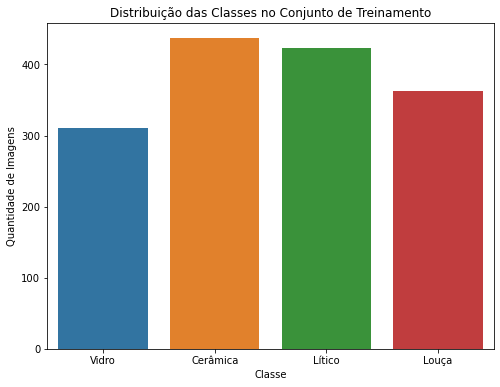

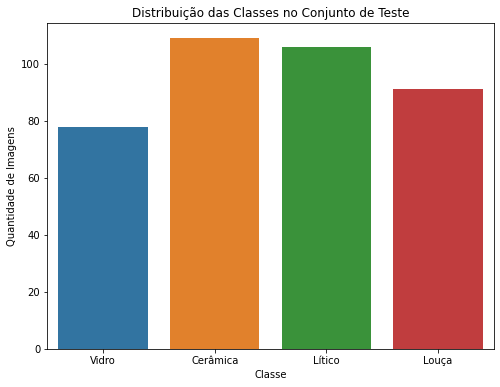

In [12]:
# Converter as contagens em DataFrames
train_counts_df = pd.DataFrame({
    'Classe': [class_labels[cls] for cls in classes],
    'Quantidade': [train_counts[cls] for cls in classes]
})

test_counts_df = pd.DataFrame({
    'Classe': [class_labels[cls] for cls in classes],
    'Quantidade': [test_counts[cls] for cls in classes]
})

# Gráfico para o conjunto de treinamento
plt.figure(figsize=(8,6))
sns.barplot(x='Classe', y='Quantidade', data=train_counts_df)
plt.title('Distribuição das Classes no Conjunto de Treinamento')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Imagens')
plt.show()

# Gráfico para o conjunto de teste
plt.figure(figsize=(8,6))
sns.barplot(x='Classe', y='Quantidade', data=test_counts_df)
plt.title('Distribuição das Classes no Conjunto de Teste')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Imagens')
plt.show()

# Exploração das Propriedades das Imagens

Análise das dimensões das imagens:

In [13]:
def get_image_sizes(directory, classes):
    image_sizes = []
    for cls in classes:
        cls_dir = os.path.join(directory, cls)
        for img_name in os.listdir(cls_dir):
            img_path = os.path.join(cls_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    image_sizes.append(img.size)
            except Exception as e:
                print(f"Erro ao abrir a imagem {img_path}: {e}")
    return image_sizes

# Obter as dimensões das imagens de treinamento
train_image_sizes = get_image_sizes(train_dir, classes)

# Converter em DataFrame
sizes_df = pd.DataFrame(train_image_sizes, columns=['Largura', 'Altura'])

Visualização das dimensões das imagens:

c:\Users\arthu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\arthu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


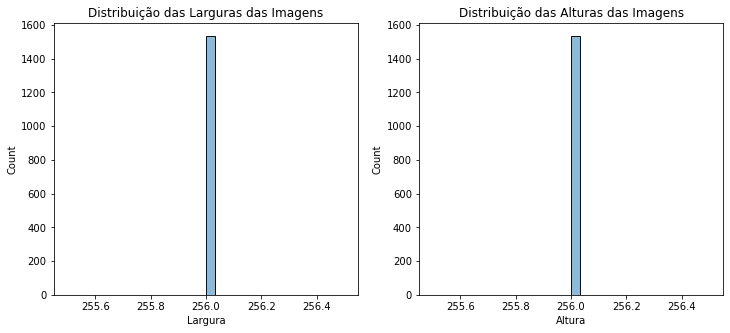

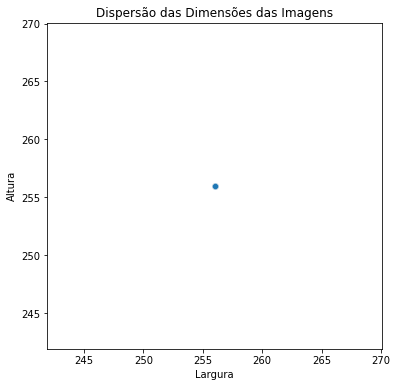

In [14]:
# Histogramas das larguras e alturas
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(sizes_df['Largura'], bins=30, kde=True)
plt.title('Distribuição das Larguras das Imagens')

plt.subplot(1,2,2)
sns.histplot(sizes_df['Altura'], bins=30, kde=True)
plt.title('Distribuição das Alturas das Imagens')

plt.show()

# Scatter plot da largura vs altura
plt.figure(figsize=(6,6))
sns.scatterplot(x='Largura', y='Altura', data=sizes_df, alpha=0.5)
plt.title('Dispersão das Dimensões das Imagens')
plt.xlabel('Largura')
plt.ylabel('Altura')
plt.show()

# Visualização de Imagens de Exemplo

Função para exibir imagens aleatórias de cada classe:

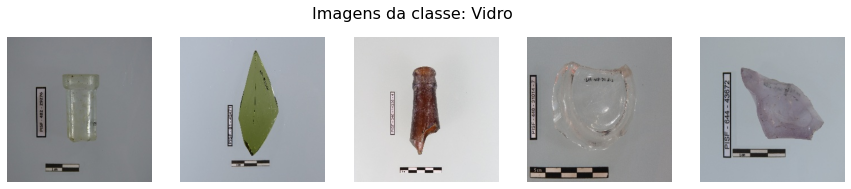

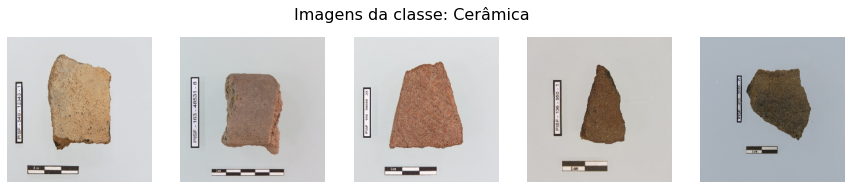

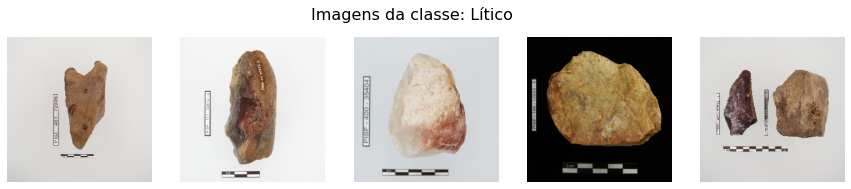

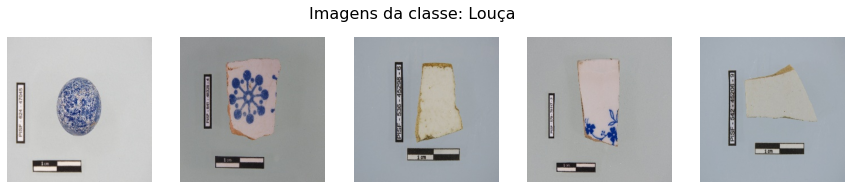

In [17]:
def display_random_images(directory, classes, num_images=5):
    for cls in classes:
        cls_dir = os.path.join(directory, cls)
        images = os.listdir(cls_dir)
        random_images = np.random.choice(images, size=min(num_images, len(images)), replace=False)
        
        plt.figure(figsize=(15,3))
        plt.suptitle(f'Imagens da classe: {class_labels[cls]}', fontsize=16)
        for i, img_name in enumerate(random_images):
            img_path = os.path.join(cls_dir, img_name)
            try:
                img = Image.open(img_path)
                plt.subplot(1, num_images, i+1)
                plt.imshow(img)
                plt.axis('off')
            except Exception as e:
                print(f"Erro ao abrir a imagem {img_path}: {e}")
        plt.show()

# Exibir imagens de treinamento
display_random_images(train_dir, classes, num_images=5)